In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn import discriminant_analysis
from sklearn.cluster import KMeans

In [49]:
mnist_df = pd.read_csv('mnist_train.csv')

In [50]:
result = mnist_df['label'] 
predictors = mnist_df.drop(['label'], axis = 1)
X = predictors.to_numpy()
Y = result.to_numpy()
X_std = X/255
split=int(X.shape[0]*0.2)
X_s =X[:split]

[[ 0.48600716 -1.22609465]
 [ 3.96751488 -1.15628014]
 [-0.20332849  1.53802168]
 ...
 [-0.69824813  0.62772539]
 [ 0.51216781 -0.02201062]
 [-0.68014141 -0.09697594]]


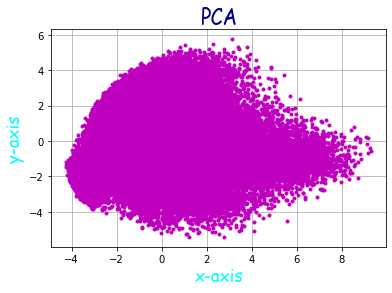

In [51]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_std)
print(X_2d)
plt.xlabel('x-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.ylabel('y-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.title('PCA',fontname='Comic Sans MS', fontsize=20,color='navy')
plt.plot(X_2d[:, 0], X_2d[:, 1], 'm.')
plt.grid()

[[-0.90459877 -0.63847802]
 [-2.89955639 -3.3132971 ]
 [ 1.96972762  0.06783832]
 ...
 [-0.03491826 -0.76497676]
 [-1.31674031 -1.72338222]
 [-1.35364085 -0.84840293]]


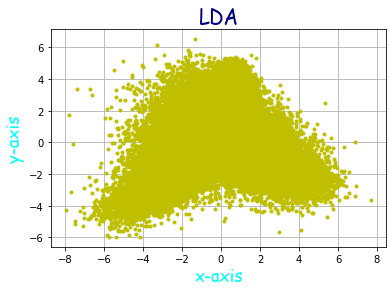

In [52]:
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X_std, Y)
print(X_lda)
plt.xlabel('x-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.ylabel('y-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.title('LDA',fontname='Comic Sans MS', fontsize=20,color='navy')
plt.plot(X_lda[:, 0], X_lda[:, 1],'y.')
plt.grid()

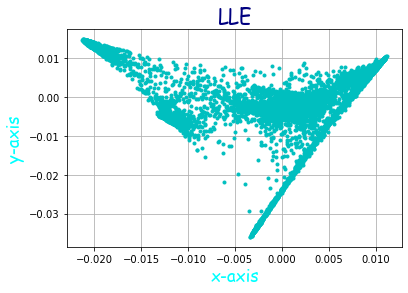

In [53]:
dr = LLE(n_components=2,n_neighbors=10)
X1 = dr.fit_transform(X_s)
plt.xlabel('x-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.ylabel('y-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.title('LLE',fontname='Comic Sans MS', fontsize=20,color='navy')
plt.plot(X1[:, 0], X1[:, 1], 'c.')
plt.grid()

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


4737.3753149123695


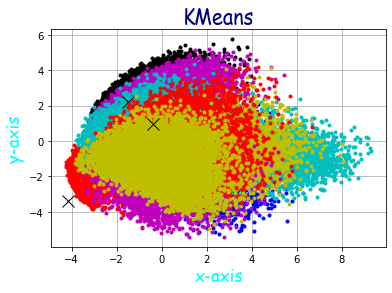

In [54]:
clu = KMeans(n_clusters=10, n_jobs=-1)
clu.fit_predict(X_lda)
centers = clu.cluster_centers_
y = clu.labels_
print(clu.inertia_/clu.n_clusters)
colors = 'bkrcmycmry'
for k in range(clu.n_clusters):
    plt.plot(X_2d[y == k, 0], X_2d[y == k, 1], colors[k]+'.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'kx', markersize=12)
plt.xlabel('x-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.ylabel('y-axis',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.title('KMeans',fontname='Comic Sans MS', fontsize=20,color='navy')
plt.grid()

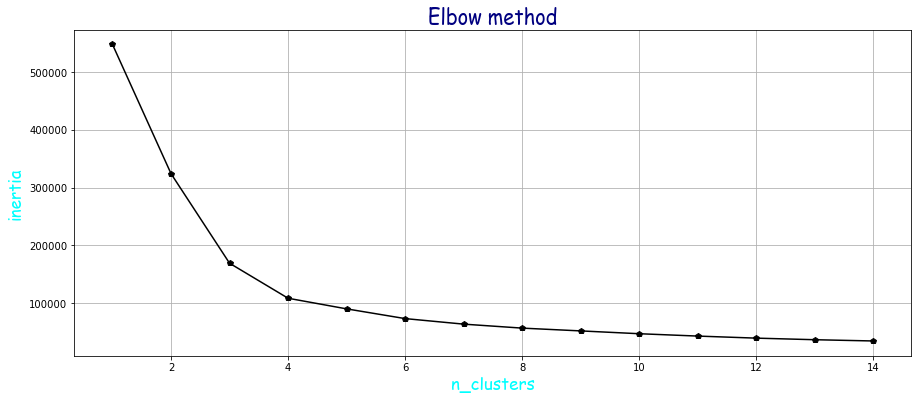

In [55]:
inertias = []
for k in range(1,15):
    clu = KMeans(n_clusters=k)
    clu.fit_predict(X_lda)
    inertias.append(clu.inertia_)
plt.figure(figsize=(15, 6))    
plt.plot(range(1,15), inertias, 'kp-')
plt.xlabel('n_clusters',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.ylabel('inertia',fontname='Comic Sans MS', fontsize=17,color='aqua')
plt.title('Elbow method',fontname='Comic Sans MS', fontsize=20,color='navy')
plt.grid()

In [56]:
totalAccuracy = 0
n_clusters=5
for k in range(1, n_clusters+1):
    clusterAccuracy = max(y==k) / sum(y==k) * 100.0
    totalAccuracy += clusterAccuracy
print("KMeans clustering Accuracy " + str(totalAccuracy / 10))

KMeans clustering Accuracy 0.009964770849488302
